In [1]:
import numpy as np
from scipy.optimize import fsolve
import sympy as sp

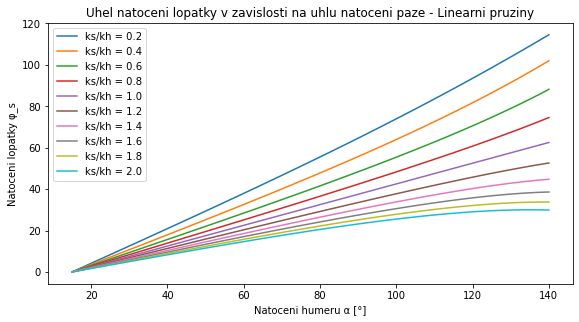

In [3]:
## linearni pruzina odvozena rucne
def func(x, alfa,pomery):
    a = 1
    b = 1
    c = 1
    d = 1
    phi0 = 15*np.pi/180
    return -pomery*a*b*np.sin(x)+c*d*np.sin(alfa-x-phi0) #pomery = ks/kh

N = 100
NG = 10
alfavec_graf = np.linspace(0*np.pi/180,90*np.pi/180,N)
alfavec = np.linspace(15*np.pi/180,140*np.pi/180,N)
phisvec = np.zeros((N,NG))
min_pomer = 0.2
max_pomer = 2
pomery = np.linspace(min_pomer,max_pomer,NG)
for j in range(NG):
    for i in range(N):
        phisvec[i,j] = fsolve(func, [1], args=(alfavec[i],pomery[j]))

import numpy as np
import matplotlib.pyplot as plt
alfavec = alfavec*180/np.pi
alfavec_graf = alfavec_graf*180/np.pi
phisvec = phisvec*180/np.pi
# plt.plot(alfavec, phisvec)
# plt.show()

plt.figure()    
for i in range(NG):
    plt.plot(alfavec,phisvec[:,i],label='ks/kh = %s' % round(pomery[i],2))
plt.xlabel("Natoceni humeru \u03B1 [°]")
plt.ylabel("Natoceni lopatky \u03C6_s")
plt.rcParams['figure.figsize'] = [9.4,4.8]
plt.title('Uhel natoceni lopatky v zavislosti na uhlu natoceni paze - Linearni pruziny')
plt.legend()
plt.savefig("Linear.jpg")
plt.show()


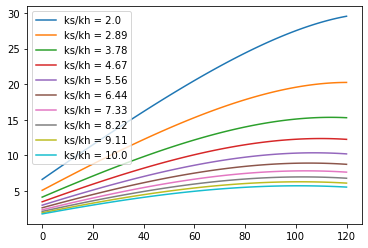

In [141]:
#linearni pruzina odvozena pomoci sympy
phis,alfa,pomery = sp.symbols('phis,alfa,pomery')
a = 1
b = 1
c = 1
d = 1
phi0 = 15*np.pi/180
phih = alfa-phi0-phis
kh = 1
ks = kh*pomery
xs = sp.sqrt(a**2+b**2+2*a*b*sp.cos(phis))
xh = sp.sqrt(c**2+d**2+2*c*d*sp.cos(phih))
Uc = 1/2*ks*xs**2+1/2*kh*xh**2
dUc = sp.diff(Uc,phis)
eq = sp.lambdify([phis,alfa,pomery], dUc, 'numpy')

N = 100
NG = 10
alfavec_graf = np.linspace(0*np.pi/180,120*np.pi/180,N)
alfavec = np.linspace(20*np.pi/180,110*np.pi/180,N)
phisvec = np.zeros((N,NG))
min_pomer = 2
max_pomer = 10
pomery = np.linspace(min_pomer,max_pomer,NG)
for j in range(NG):
    for i in range(N):
        def fun_root(x):
            return eq(x,alfavec[i],pomery[j])
        phisvec[i,j] = fsolve(fun_root, [1])

import numpy as np
import matplotlib.pyplot as plt
alfavec = alfavec*180/np.pi
alfavec_graf = alfavec_graf*180/np.pi
phisvec = phisvec*180/np.pi
# plt.plot(alfavec, phisvec)
# plt.show()

plt.figure()    
for i in range(NG):
    plt.plot(alfavec_graf,phisvec[:,i],label='ks/kh = %s' % round(pomery[i],2))
plt.legend()
plt.show()



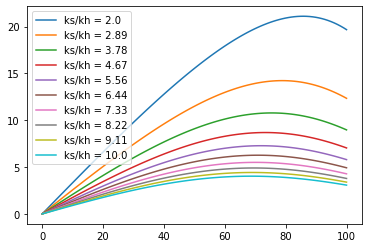

In [145]:
#nelilinearni pruzina odvozena pomoci sympy
phis,alfa,pomery,l0,x = sp.symbols('phis,alfa,pomery,l0,x')
a = 1
b = 1
c = 1
d = 1
phi0 = 0*np.pi/180
phih = alfa-phi0-phis
l0=0
kh = 1
ks = kh*pomery
xs = sp.sqrt(a**2+b**2+2*a*b*sp.cos(phis))
xh = sp.sqrt(c**2+d**2+2*c*d*sp.cos(phih))
# Uc = 7/2*(ks*((xs-l0)**(7/2)-(xs-2*l0)**(7/2))+kh*((xh-l0)**(7/2)-(xh-2*l0)**(7/2))) #s l0
Uc = 7/2*ks*xs**(7/2)+7/2*kh*xh**(7/2) #bez l0
dUc = sp.diff(Uc,phis)
eq = sp.lambdify([phis,alfa,pomery], dUc, 'numpy')

N = 100
NG = 10
alfa_start = 0*np.pi/180
alfa_end = 100*np.pi/180

alfavec_graf = np.linspace(alfa_start,alfa_end,N)
alfavec = np.linspace(alfa_start,alfa_end,N)
phisvec = np.zeros((N,NG))
min_pomer = 2
max_pomer = 10
pomery = np.linspace(min_pomer,max_pomer,NG)
for j in range(NG):
    for i in range(N):
        def fun_root(x):
            return eq(x,alfavec[i],pomery[j])
        phisvec[i,j] = fsolve(fun_root, [0.9])

import numpy as np
import matplotlib.pyplot as plt
alfavec = alfavec*180/np.pi
alfavec_graf = alfavec_graf*180/np.pi
phisvec = phisvec*180/np.pi
# plt.plot(alfavec, phisvec)
# plt.show()

plt.figure()    
for i in range(NG):
    plt.plot(alfavec_graf,phisvec[:,i],label='ks/kh = %s' % round(pomery[i],2))
plt.legend()
plt.show()

C:\Users\zoufi\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


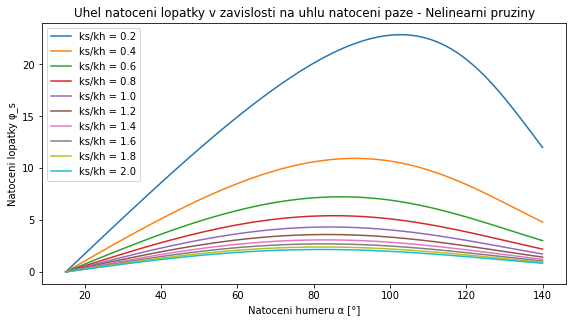

In [5]:
#nelinearni pruzina, sympy odvozeni Uc i dUc
phis,alfa,pomery,l0,x = sp.symbols('phis,alfa,pomery,l0,x')
kh = 1
ks = kh*pomery
Fs = ks*(x-l0)**(5/2)
Fh = kh*(x-l0)**(5/2)
a = 0.08
b = 0.09
c = 0.05
d = 0.04
phi0 = 15*np.pi/180
phih = alfa-phi0-phis
Us = sp.integrate(Fs,(x,l0,x+l0))
Uh = sp.integrate(Fh,(x,l0,x+l0))
xs = sp.sqrt(a**2+b**2+2*a*b*sp.cos(phis))
xh = sp.sqrt(c**2+d**2+2*c*d*sp.cos(phih))
Us = Us.subs(x,xs)
Uh = Uh.subs(x,xh)
Uc = Us+Uh
dUc = sp.diff(Uc,phis)
eq = sp.lambdify([phis,alfa,pomery,l0], dUc, 'numpy')



N = 100
NG = 10
alfa_start = 15*np.pi/180
alfa_end = 140*np.pi/180

alfavec_graf = np.linspace(alfa_start,alfa_end,N)
alfavec = np.linspace(alfa_start,alfa_end,N)
phisvec = np.zeros((N,NG))
min_pomer = 0.2
max_pomer = 2
pomery = np.linspace(min_pomer,max_pomer,NG)
for j in range(NG):
    for i in range(N):
        def fun_root(x):
            return eq(x,alfavec[i],pomery[j],0)
        phisvec[i,j] = fsolve(fun_root, [0.9])

import numpy as np
import matplotlib.pyplot as plt
alfavec = alfavec*180/np.pi
alfavec_graf = alfavec_graf*180/np.pi
phisvec = phisvec*180/np.pi
# plt.plot(alfavec, phisvec)
# plt.show()

plt.figure()    
for i in range(NG):
    plt.plot(alfavec_graf,phisvec[:,i],label='ks/kh = %s' % round(pomery[i],2))
plt.xlabel("Natoceni humeru \u03B1 [°]")
plt.ylabel("Natoceni lopatky \u03C6_s")
plt.legend()
plt.rcParams['figure.figsize'] = [9.4,4.8]
plt.title('Uhel natoceni lopatky v zavislosti na uhlu natoceni paze - Nelinearni pruziny')
plt.savefig("Nonlinear.jpg")
plt.show()

In [2]:
b = 4
print(4)

4
